In [43]:
#%pip install pandas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from colorstreak import Logger
import polars as pl
import yfinance as yf


In [44]:
ruta = '/Users/ferleon/Github/semestre_v/ciencia_de_datos_aplicada_a_la_economia/data/Bitcoin_4_30_2024-6_29_2024_historical_data_coinmarketcap.csv'
data_frame = pd.read_csv(ruta, sep=';')

In [45]:


data_frame['timeClose'] = pd.to_datetime(data_frame['timeClose']) 

In [46]:
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timeClose  484 non-null    datetime64[ns, UTC]
 1   close      484 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 7.7 KB


In [47]:


serie_precios = pd.Series(data_frame["close"])
serie_precios = serie_precios.dropna()





# VER LA GRAFICA DE COMO SE HA COMPORTADO EL BITCOIN EN EL TIEMPO

Text(0.5, 1.0, 'Precio Cierre Bitcoin | UN AÑO')

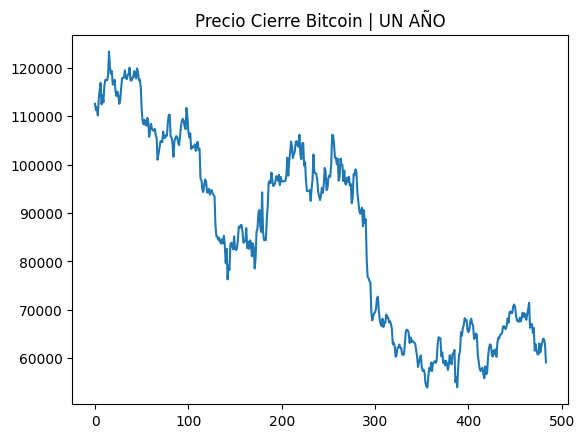

In [48]:
plt.plot(serie_precios, label="Precio Cierre Bitcoin")
plt.title("Precio Cierre Bitcoin | UN AÑO")

# RENDIMIENTOS SIMPLES USO

[DEBUG] 1    -0.011753
2     0.005220
3    -0.015011
4     0.030276
5     0.016886
6     0.012999
7    -0.038118
8     0.016507
9    -0.012632
10    0.030321
Name: close, dtype: float64


Text(0.5, 1.0, 'Rendimiento Bitcoin | RENDIMIENTO SIMPLE')

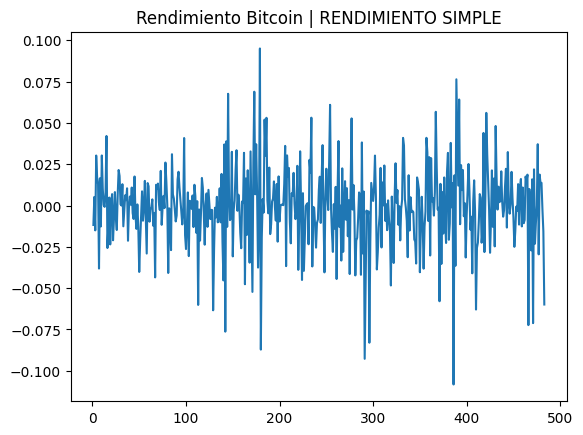

In [ ]:
# ============================= FUNCIONES RENDIMIENTO SIMPLE =============================
def rendimiento(precio_inicial,precio_final):
    return (precio_final - precio_inicial) / precio_inicial


def rendimiento_simple_numpy(precios: pd.Series) -> pd.Series:
    return precios.pct_change()
#========================================================================================


# ============================= RENDIMIENTO SIMPLE USO =============================
rendimiento_bitcoin_numpy = rendimiento_simple_numpy(serie_precios)
rendimiento_bitcoin_numpy = rendimiento_bitcoin_numpy.dropna()
Logger.debug(rendimiento_bitcoin_numpy[:10])


# ============================= FUNCIONES RENDIMIENTO LOGARITMICO =============================
plt.plot(rendimiento_bitcoin_numpy, label="Rendimiento Bitcoin")
plt.title("Rendimiento Bitcoin | RENDIMIENTO SIMPLE")

# RENDIMIENTO LOGARÍTMICO USO

[DEBUG] 1    -0.011823
2     0.005207
3    -0.015125
4     0.029826
5     0.016745
6     0.012915
7    -0.038864
8     0.016372
9    -0.012713
10    0.029870
Name: close, dtype: float64


Text(0.5, 1.0, 'Rendimiento Bitcoin | RENDIMIENTO LOGARÍTMICO')

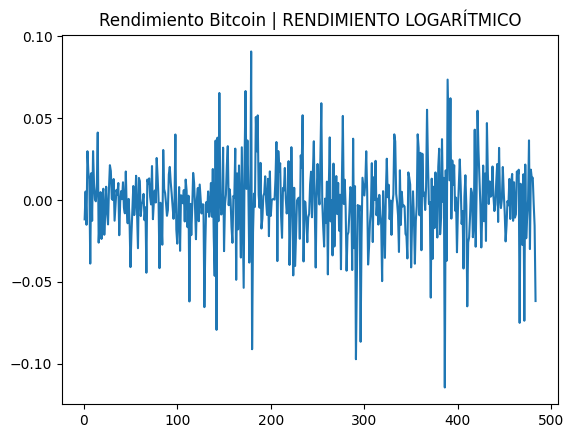

In [50]:
# ============================= FUNCIONES RENDIMIENTO LOGARÍTMICO =============================
def rendimiento_logaritmico(precio_inicial, precio_final):
    return np.log(precio_final / precio_inicial)


def rendimiento_logaritmico_numpy(precios):
    return np.log(precios / precios.shift(1))
# =============================================================================================



# ============================= RENDIMIENTO LOGARÍTMICO USO =============================
rendimiento_logaritmico_shift_list = [rendimiento_logaritmico_numpy(serie_precios)]
rendimiento_logaritmico_shift_list = rendimiento_logaritmico_shift_list[0].dropna()
Logger.debug(rendimiento_logaritmico_shift_list[:10])



# ============================= GRÁFICA RENDIMIENTO LOGARÍTMICO =============================
plt.plot(rendimiento_logaritmico_shift_list, label="Rendimiento Logarítmico Bitcoin")
plt.title("Rendimiento Bitcoin | RENDIMIENTO LOGARÍTMICO")

# VOLATILIDAD

In [51]:
# ============================= FUNCIONES DE VOLATILIDAD =============================
def rendimiento_promedio(rendimientos):
    return sum(rendimientos)/len(rendimientos)


def volatilidad_diaria(rendimientos):
    suma = 0
    n = len(rendimientos)
    for r in rendimientos:
        suma += (r - rendimiento_promedio(rendimientos))**2
    return (suma/(n-1))**0.5



# Fomula con numpy
def volatilidad_diaria_numpy(rendimientos):
    return np.std(rendimientos, ddof=1)
# =====================================================================================


precios = serie_precios

rendimientos = rendimiento_simple_numpy(precios)
rendimientos = rendimientos.dropna()
volatilidad = volatilidad_diaria_numpy(rendimientos)
Logger.debug(f"Volatilidad diaria (simple): {volatilidad:.4f}")



rendimiento_log = rendimiento_logaritmico_numpy(precios)
rendimiento_log = rendimiento_log.dropna()
volatilidad_log = volatilidad_diaria_numpy(rendimiento_log)
Logger.debug(f"Volatilidad diaria (logarítmica): {volatilidad_log:.4f}")

[DEBUG] Volatilidad diaria (simple): 0.0244
[DEBUG] Volatilidad diaria (logarítmica): 0.0245


# CARGAMOS LOS DATOS DE BITCOIN EN POLARS

In [52]:


#  Bitcoin |  Desde que existe
data_bitcoin = yf.download("BTC-USD", start="2008-01-01")

print("\n [PANDAS] Bitcoin data:")
print(data_bitcoin.head()) # type: ignore
print(f"\n [PANDAS] data_bitcoin.columns: \n{data_bitcoin.columns}") # type: ignore


data_bitcoin.columns = ["_".join(col).strip() for col in data_bitcoin.columns.values] # type: ignore
data_bitcoin = data_bitcoin.reset_index() # type: ignore

# Dataframe de Bitcoin
lf_bitcoin = pl.LazyFrame(data_bitcoin)

lf_bitcoin = lf_bitcoin.with_columns(
    pl.col("Date").dt.date().alias("Date")
)



print("\n [POLARS] Bitcoin dataframe:")
print(lf_bitcoin.limit(5).collect())
print(f"\n [POLARS] lf_bitcoin.columns: \n{lf_bitcoin.columns}")


/var/folders/j4/21ypxx3x0019wgj7rqnlm2340000gn/T/ipykernel_72246/1885349233.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_bitcoin = yf.download("BTC-USD", start="2008-01-01")
[*********************100%***********************]  1 of 1 completed


 [PANDAS] Bitcoin data:
Price            Close        High         Low        Open    Volume
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD   BTC-USD
Date                                                                
2014-09-17  457.334015  468.174011  452.421997  465.864014  21056800
2014-09-18  424.440002  456.859985  413.104004  456.859985  34483200
2014-09-19  394.795990  427.834991  384.532013  424.102997  37919700
2014-09-20  408.903992  423.295990  389.882996  394.673004  36863600
2014-09-21  398.821014  412.425995  393.181000  408.084991  26580100

 [PANDAS] data_bitcoin.columns: 
MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

 [POLARS] Bitcoin dataframe:
shape: (5, 6)
┌────────────┬───────────────┬──────────────┬─────────────┬──────────────┬────────────────┐
│ Date       ┆ Close_BTC-USD ┆ High_BTC


/var/folders/j4/21ypxx3x0019wgj7rqnlm2340000gn/T/ipykernel_72246/1885349233.py:23: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  print(f"\n [POLARS] lf_bitcoin.columns: \n{lf_bitcoin.columns}")


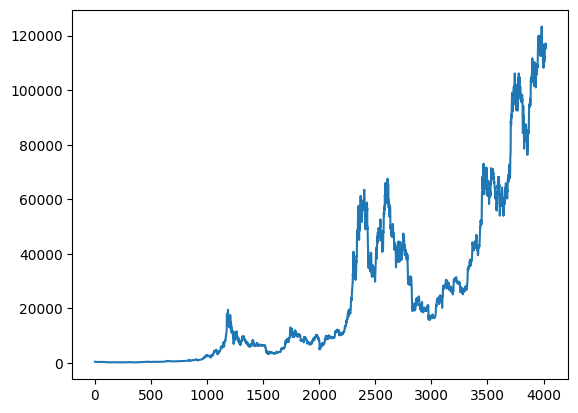

In [53]:
serie_precios = (
    lf_bitcoin
    .select('Close_BTC-USD')
    .collect()
    .to_series()
)

plt.plot(serie_precios, label="Precio Cierre Bitcoin")

[INFO] Rendimiento logaritmico shape: (5, 7)
┌────────────┬──────────────┬──────────────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ Date       ┆ Close_BTC-US ┆ High_BTC-USD ┆ Low_BTC-USD ┆ Open_BTC-US ┆ Volume_BTC- ┆ rendimiento │
│ ---        ┆ D            ┆ ---          ┆ ---         ┆ D           ┆ USD         ┆ _logaritmic │
│ date       ┆ ---          ┆ f64          ┆ f64         ┆ ---         ┆ ---         ┆ o           │
│            ┆ f64          ┆              ┆             ┆ f64         ┆ i64         ┆ ---         │
│            ┆              ┆              ┆             ┆             ┆             ┆ f64         │
╞════════════╪══════════════╪══════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ 2014-09-18 ┆ 424.440002   ┆ 456.859985   ┆ 413.104004  ┆ 456.859985  ┆ 34483200    ┆ -0.074643   │
│ 2014-09-19 ┆ 394.79599    ┆ 427.834991   ┆ 384.532013  ┆ 424.102997  ┆ 37919700    ┆ -0.072402   │
│ 2014-09-20 ┆ 408.903992   ┆ 423.29599    ┆ 3

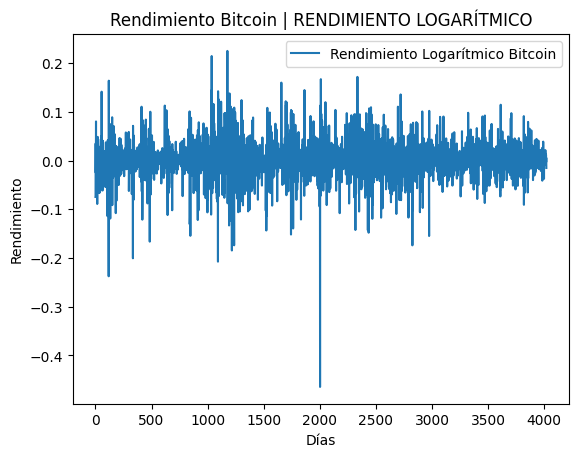

In [54]:
# Retorno de Bitcoin usando Polars native expressions
precios = (
    lf_bitcoin
    .with_columns(
        (pl.col('Close_BTC-USD') / pl.col('Close_BTC-USD').shift(1))
        .log()
        .alias('rendimiento_logaritmico')
    )
    .drop_nulls("rendimiento_logaritmico")  # eliminamos la fila inicial
)

Logger.info(f"Rendimiento logaritmico {precios.limit(5).collect()}")





serie_rendimientos = (
    precios
    .select("rendimiento_logaritmico")
    .collect()
    .to_series()
)

Logger.debug(serie_rendimientos[:10])


plt.plot(serie_rendimientos, label="Rendimiento Logarítmico Bitcoin")
plt.title("Rendimiento Bitcoin | RENDIMIENTO LOGARÍTMICO")
plt.xlabel("Días")
plt.ylabel("Rendimiento")
plt.legend()
plt.show()


In [55]:
# ============================= FUNCIONES DE VOLATILIDAD =============================
def volatilidad_diaria_numpy(rendimientos):
    # Uso con polars
    volatilidad = rendimientos.std(ddof=1)
    return volatilidad

# ============================ VOLATILIDAD DIARIA USO ==========================
volatilidad = volatilidad_diaria_numpy(serie_rendimientos)
volatilidad_anual = volatilidad_diaria_numpy(serie_rendimientos) * (252**0.5)  # Asumiendo 252 días hábiles en un año
Logger.info(f"Volatilidad diaria (logarítmica) Polars: {volatilidad:.4f}")
Logger.info(f"Volatilidad anual (logarítmica) Polars: {volatilidad_anual:.4f}")

[INFO] Volatilidad diaria (logarítmica) Polars: 0.0357
[INFO] Volatilidad anual (logarítmica) Polars: 0.5667


# RENDIMIENTO ANUALIZADO

In [62]:
# ============================= RENDIMIENTO ANUALIZADO =============================
def rendimiento_anualizado(rendimientos, periodos_rendimientos = 252):
    
    rendimiento_acumulado = rendimiento_simple_numpy(rendimientos)
    rendimiento_acumulado = rendimiento_acumulado.sum()
    
    rendimiento_anual = ((1 + rendimiento_acumulado) ** (252 / periodos_rendimientos)) - 1
    return rendimiento_anual

# ============================ RENDIMIENTO ANUALIZADO USO ==========================

precios = serie_precios

rendimiento_anual = rendimiento_anualizado(precios)
Logger.info(f"Rendimiento anualizado (simple): {rendimiento_anual:.2f}%")



[INFO] Rendimiento anualizado (simple): 8.08%
